## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## Loading the Datasets

In [4]:
training = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/train_ctrUa4K.csv')

In [5]:
training

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
testing = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/test_lAUu6dG.csv')

In [ ]:
testing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [7]:
submission = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/sample_submission_49d68Cx.csv')

In [ ]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [8]:
train_original=training.copy()
test_original=testing.copy()

## Understanding the Dataset

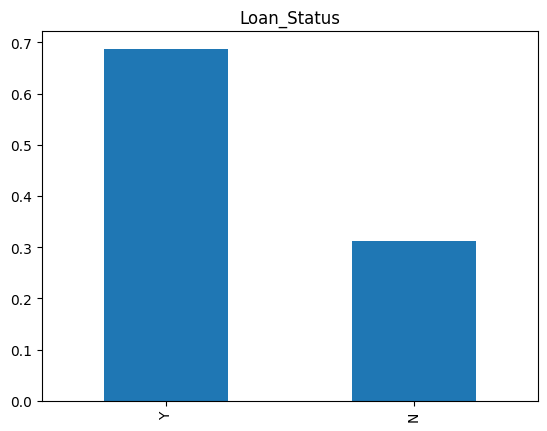

From totaldata  68.73 % contains granted Loan
From totaldata  31.27 % contains rejected Loan


In [9]:
training['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Loan_Status')
plt.show()
print('From totaldata ',np.round(training[training['Loan_Status'] == 'Y'].shape[0]/training.shape[0]*100,2), '% contains granted Loan')
print('From totaldata ',np.round(training[training['Loan_Status'] == 'N'].shape[0]/training.shape[0]*100,2), '% contains rejected Loan')

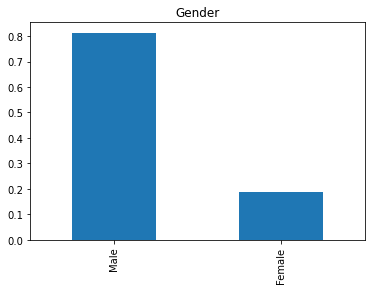

From totaldata 79.64 % contains Males
From totaldata 18.24 % contains Females


In [ ]:
training['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.show()
print('From totaldata',np.round(training[training['Gender'] == 'Male'].shape[0]/training.shape[0]*100,2), '% contains Males')
print('From totaldata',np.round(training[training['Gender'] == 'Female'].shape[0]/training.shape[0]*100,2), '% contains Females')

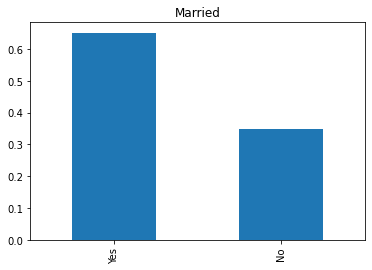

From totaldata 64.82 % contains people who are married
From totaldata 34.69 % contains people who are not married


In [ ]:
training['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.show()
print('From totaldata',np.round(training[training['Married'] == 'Yes'].shape[0]/training.shape[0]*100,2), '% contains people who are married')
print('From totaldata',np.round(training[training['Married'] == 'No'].shape[0]/training.shape[0]*100,2), '% contains people who are not married')

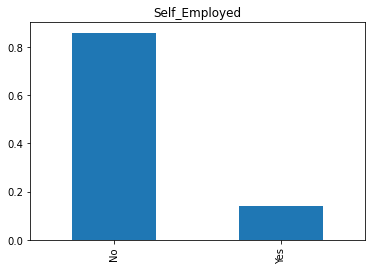

From totaldata 13.36 % contains Self-employed people
From totaldata 81.43 % contains people who are not Self-employed


In [ ]:
training['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.show()
print('From totaldata',np.round(training[training['Self_Employed'] == 'Yes'].shape[0]/training.shape[0]*100,2), '% contains Self-employed people')
print('From totaldata',np.round(training[training['Self_Employed'] == 'No'].shape[0]/training.shape[0]*100,2), '% contains people who are not Self-employed')

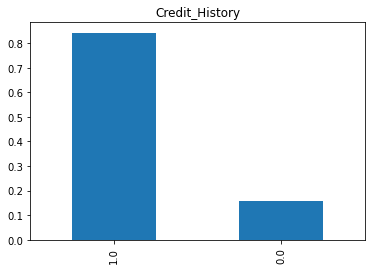

From totaldata 0.0 % contains people with credit history 1.0
From totaldata 0.0 % contains people with credit history 0.0


In [ ]:
training['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()
print('From totaldata',np.round(training[training['Credit_History'] == '1.0'].shape[0]/training.shape[0]*100,2), '% contains people with credit history 1.0')
print('From totaldata',np.round(training[training['Credit_History'] == '0.0'].shape[0]/training.shape[0]*100,2), '% contains people with credit history 0.0')

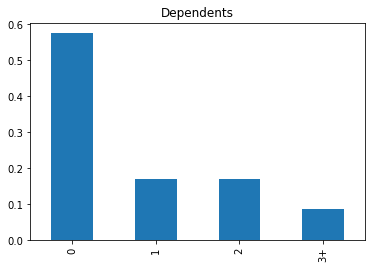

From totaldata 56.19 % contains people with 0 dependency
From totaldata 16.61 % contains people with 1 dependency
From totaldata 16.45 % contains people with 2 dependency
From totaldata 8.31 % contains people with 3+ dependency


In [ ]:
training['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.show()
print('From totaldata',np.round(training[training['Dependents'] == '0'].shape[0]/training.shape[0]*100,2), '% contains people with 0 dependency')
print('From totaldata',np.round(training[training['Dependents'] == '1'].shape[0]/training.shape[0]*100,2), '% contains people with 1 dependency')
print('From totaldata',np.round(training[training['Dependents'] == '2'].shape[0]/training.shape[0]*100,2), '% contains people with 2 dependency')
print('From totaldata',np.round(training[training['Dependents'] == '3+'].shape[0]/training.shape[0]*100,2), '% contains people with 3+ dependency')

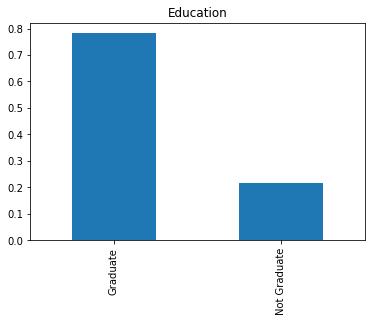

From totaldata 78.18 % contains people who are graduated
From totaldata 21.82 % contains people who are not graduated


In [ ]:
training['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.show()
print('From totaldata',np.round(training[training['Education'] == 'Graduate'].shape[0]/training.shape[0]*100,2), '% contains people who are graduated')
print('From totaldata',np.round(training[training['Education'] == 'Not Graduate'].shape[0]/training.shape[0]*100,2), '% contains people who are not graduated')

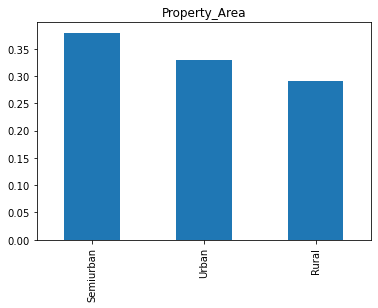

From totaldata 37.95 % contains people who reside in Semiurban areas
From totaldata 32.9 % contains people who reside in Urban areas
From totaldata 29.15 % contains people who reside in Rural areas


In [ ]:
training['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()
print('From totaldata',np.round(training[training['Property_Area'] == 'Semiurban'].shape[0]/training.shape[0]*100,2), '% contains people who reside in Semiurban areas')
print('From totaldata',np.round(training[training['Property_Area'] == 'Urban'].shape[0]/training.shape[0]*100,2), '% contains people who reside in Urban areas')
print('From totaldata',np.round(training[training['Property_Area'] == 'Rural'].shape[0]/training.shape[0]*100,2), '% contains people who reside in Rural areas')

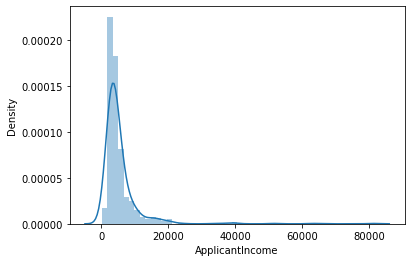

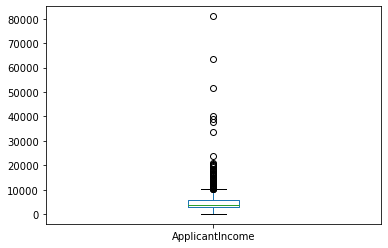

In [ ]:
sns.distplot(training['ApplicantIncome'])
plt.show()
training['ApplicantIncome'].plot.box()
plt.show()

Text(0.5, 0.98, '')

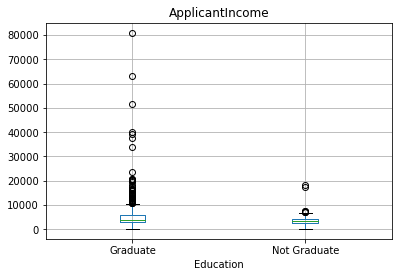

In [ ]:
training.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle('')

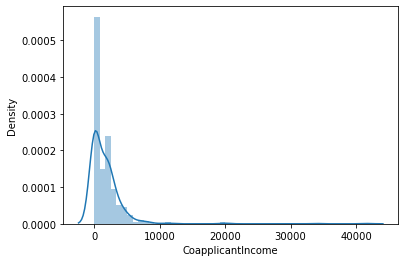

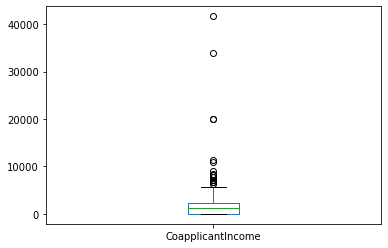

In [ ]:
sns.distplot(training['CoapplicantIncome'])
plt.show()
training['CoapplicantIncome'].plot.box()
plt.show()

## Exploratory Data Analysis

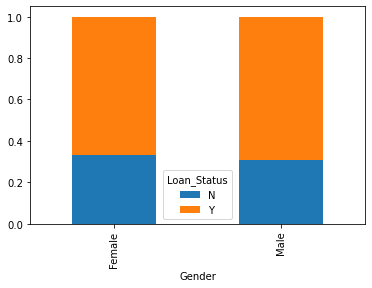

In [ ]:
Gen = pd.crosstab(training['Gender'],training['Loan_Status'])
Gen.div(Gen.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

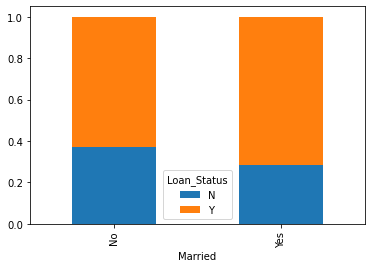

In [ ]:
Marriage_status = pd.crosstab(training['Married'],training['Loan_Status'])
Marriage_status.div(Marriage_status.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)
plt.show()

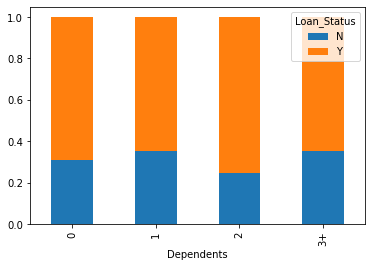

In [ ]:
Dependent = pd.crosstab(training['Dependents'],training['Loan_Status'])
Dependent.div(Dependent.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

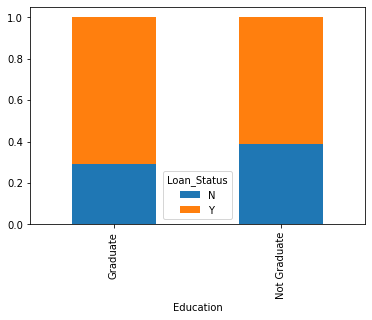

In [ ]:
Edu = pd.crosstab(training['Education'],training['Loan_Status'])
Edu.div(Edu.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

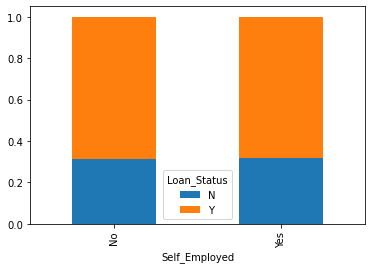

In [ ]:
Self_Emp = pd.crosstab(training['Self_Employed'],training['Loan_Status'])
Self_Emp.div(Self_Emp.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

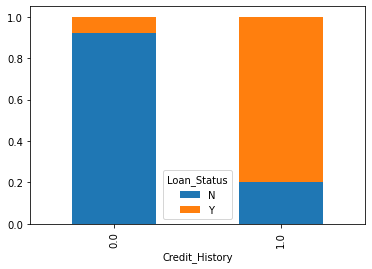

In [ ]:
Cred_Hist = pd.crosstab(training['Credit_History'],training['Loan_Status'])
Cred_Hist.div(Cred_Hist.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

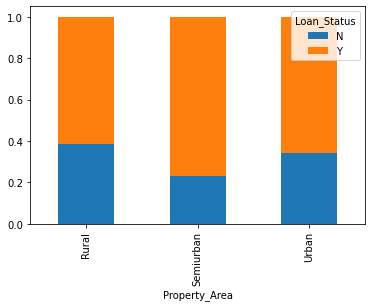

In [ ]:
Prop_Area = pd.crosstab(training['Property_Area'],training['Loan_Status'])
Prop_Area.div(Prop_Area.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

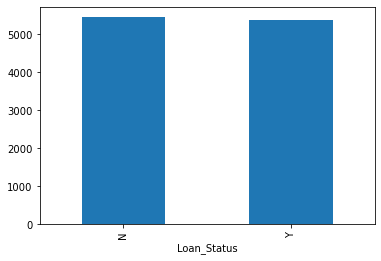

In [ ]:
training.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

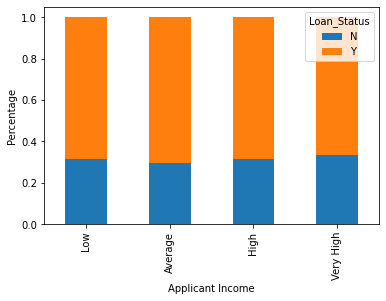

In [ ]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training['Income_bins'] = pd.cut(training['ApplicantIncome'], bins, labels = group)
Income_bins = pd.crosstab(training['Income_bins'],training['Loan_Status'])
Income_bins.div(Income_bins.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

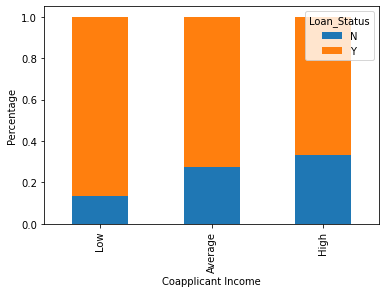

In [ ]:
bins = [0, 1000,3000, 42000]
group = ['Low', 'Average', 'High']
training['Coapplicant_Income_bins'] = pd.cut(training['CoapplicantIncome'], bins, labels = group)
Coapplicant_Income_bins = pd.crosstab(training['Coapplicant_Income_bins'],training['Loan_Status'])
Coapplicant_Income_bins.div(Coapplicant_Income_bins.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

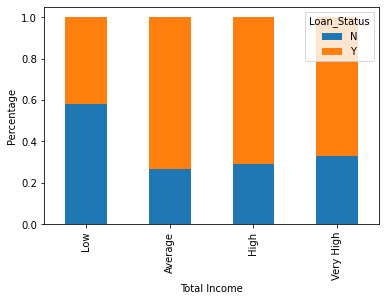

In [ ]:
training['Total_Income'] = training['ApplicantIncome'] + training['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
training['Total_Income_bins'] = pd.cut(training['Total_Income'], bins, labels = group)
Total_Income_bins = pd.crosstab(training['Total_Income_bins'],training['Loan_Status'])
Total_Income_bins.div(Total_Income_bins.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

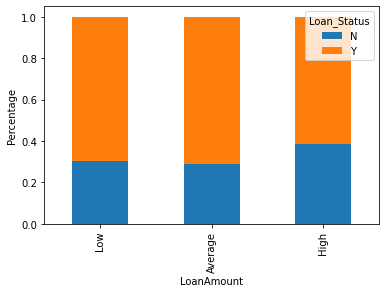

In [ ]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
training['LoanAmount_bins'] = pd.cut(training['LoanAmount'], bins, labels = group)
LoanAmount_bins = pd.crosstab(training['LoanAmount_bins'],training['Loan_Status'])
LoanAmount_bins.div(LoanAmount_bins.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [ ]:
training= training.drop(['Income_bins', 'Total_Income_bins', 'LoanAmount_bins', 'Coapplicant_Income_bins','Total_Income'], axis = 1)

In [ ]:
training['Dependents'].replace('3+', 3, inplace = True)
testing['Dependents'].replace('3+', 3, inplace = True)
training['Loan_Status'].replace('N', 0, inplace = True)
training['Loan_Status'].replace('Y', 1, inplace = True)

<AxesSubplot:>

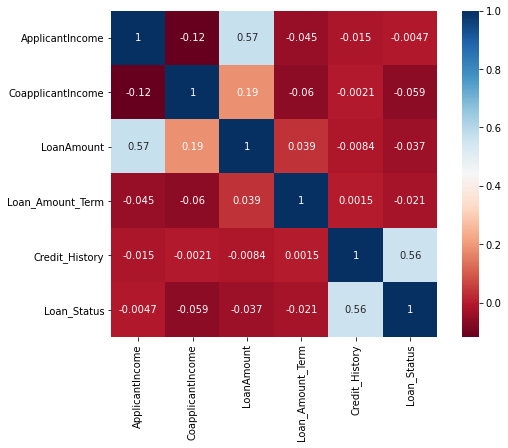

In [ ]:
matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=1,square=True,cmap='RdBu', annot = True)

## Replacing missing data

In [ ]:
training.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
training['Gender'].fillna(training['Gender'].mode()[0], inplace = True)
training['Married'].fillna(training['Married'].mode()[0], inplace = True)
training['Dependents'].fillna(training['Dependents'].mode()[0], inplace = True)
training['Self_Employed'].fillna(training['Self_Employed'].mode()[0], inplace = True)
training['Credit_History'].fillna(training['Credit_History'].mode()[0], inplace = True)
training['Loan_Amount_Term'].fillna(training['Loan_Amount_Term'].mode()[0], inplace = True)
training['LoanAmount'].fillna(training['LoanAmount'].median(), inplace = True)

In [ ]:
training.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
testing['Gender'].fillna(training['Gender'].mode()[0], inplace = True)
testing['Married'].fillna(training['Married'].mode()[0], inplace = True)
testing['Dependents'].fillna(training['Dependents'].mode()[0], inplace = True)
testing['Self_Employed'].fillna(training['Self_Employed'].mode()[0], inplace = True)
testing['Credit_History'].fillna(training['Credit_History'].mode()[0], inplace = True)
testing['Loan_Amount_Term'].fillna(training['Loan_Amount_Term'].mode()[0], inplace = True)
testing['LoanAmount'].fillna(training['LoanAmount'].median(), inplace = True)

In [ ]:
testing.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outlier Treatment

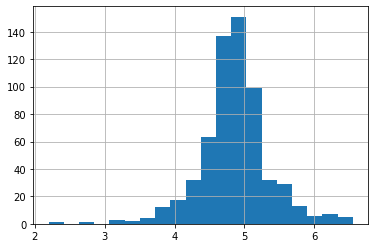

In [ ]:
training['LoanAmount_log']=np.log(training['LoanAmount'])
training['LoanAmount_log'].hist(bins=20)
testing['LoanAmount_log']=np.log(testing['LoanAmount'])

## Logistic Regression

In [ ]:
training = training.drop('Loan_ID',axis=1)
testing = testing.drop('Loan_ID',axis=1)

In [ ]:
X = training.drop('Loan_Status',1)
y = training.Loan_Status

In [ ]:
X = pd.get_dummies(X)
training = pd.get_dummies(training)
testing = pd.get_dummies(testing)

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_cv, y_training, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_training, y_training)

LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8

In [ ]:
pred_test = model.predict(testing)

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:\\Users\\Piyush\\Desktop\\DataMining\\logistic.csv')

## Feature Engineering

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

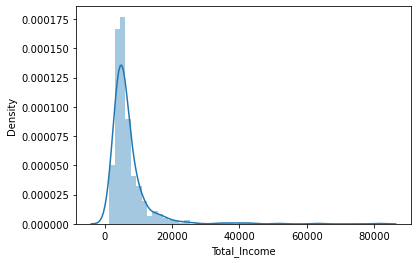

In [ ]:
training['Total_Income']=training['ApplicantIncome']+training['CoapplicantIncome']
testing['Total_Income']=testing['ApplicantIncome']+testing['CoapplicantIncome']
sns.distplot(training['Total_Income'])

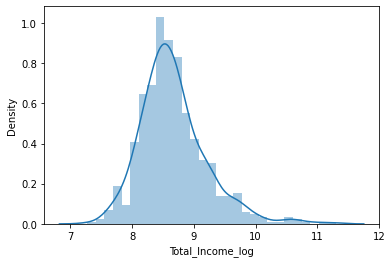

In [ ]:
training['Total_Income_log'] = np.log(training['Total_Income'])
sns.distplot(training['Total_Income_log'])
testing['Total_Income_log'] = np.log(testing['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

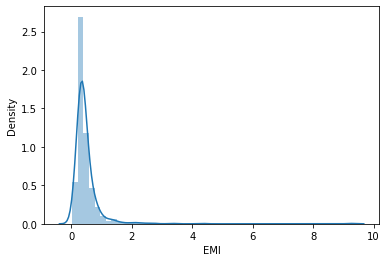

In [ ]:
training['EMI']=training['LoanAmount']/training['Loan_Amount_Term']
testing['EMI']=testing['LoanAmount']/testing['Loan_Amount_Term']
sns.distplot(training['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

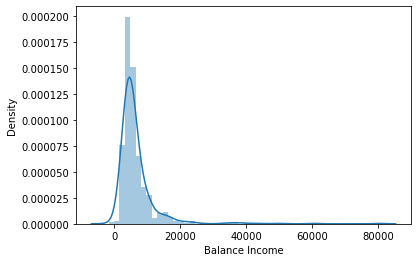

In [ ]:
training['Balance Income'] = training['Total_Income']-(training['EMI']*1000)
testing['Balance Income'] = testing['Total_Income']-(testing['EMI']*1000)
sns.distplot(training['Balance Income'])

In [ ]:
training=training.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
testing=testing.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building Part 2:

## Logistic Regression

In [ ]:
x = training.drop('Loan_Status',1)
y = training.Loan_Status

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for training_index,testing_index in kf.split(x,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = x.loc[training_index],x.loc[testing_index]
 ytr,yvl = y[training_index],y[testing_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(testing)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.7214314274290283


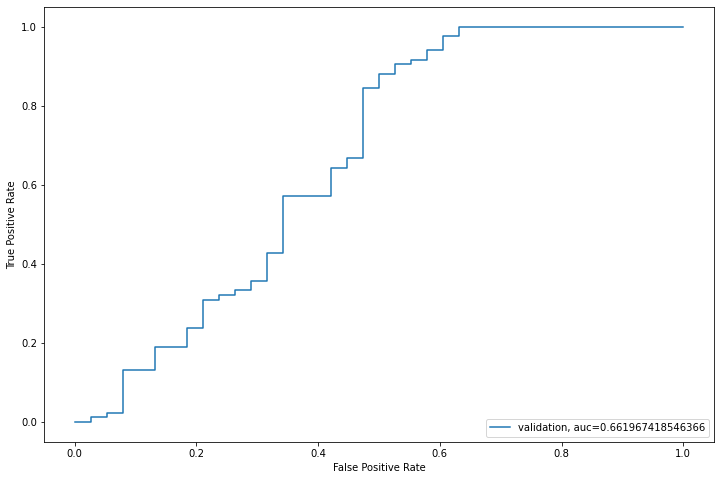

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:\\Users\\Piyush\\Desktop\\DataMining\\Log2.csv')

## Decision Tree

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for training_index,testing_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[training_index],X.loc[testing_index]
    ytr,yvl = y[training_index],y[testing_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(testing)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.6991869918699187

2 of kfold 5 
accuracy_score 0.7398373983739838

3 of kfold 5 
accuracy_score 0.7154471544715447

4 of kfold 5 
accuracy_score 0.7235772357723578

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7100359856057576


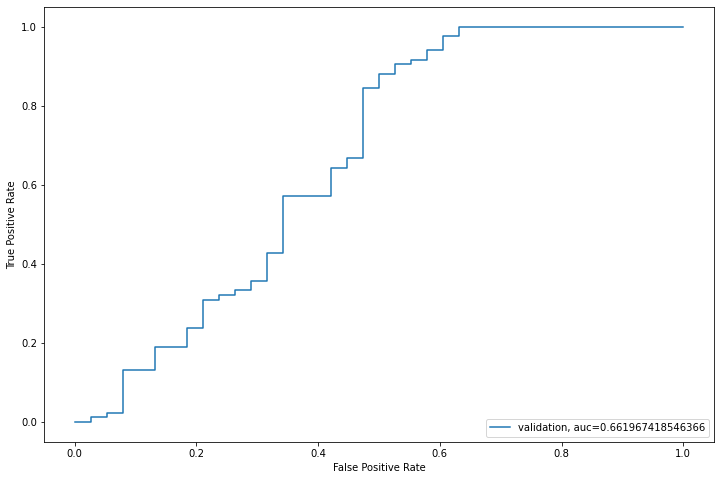

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:\\Users\\Piyush\\Desktop\\DataMining\\DecisionTree.csv')

## Random Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for training_index,testing_index in kf.split(X,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = X.loc[training_index],X.loc[testing_index]
 ytr,yvl = y[training_index],y[testing_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(testing)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.8044782087165135


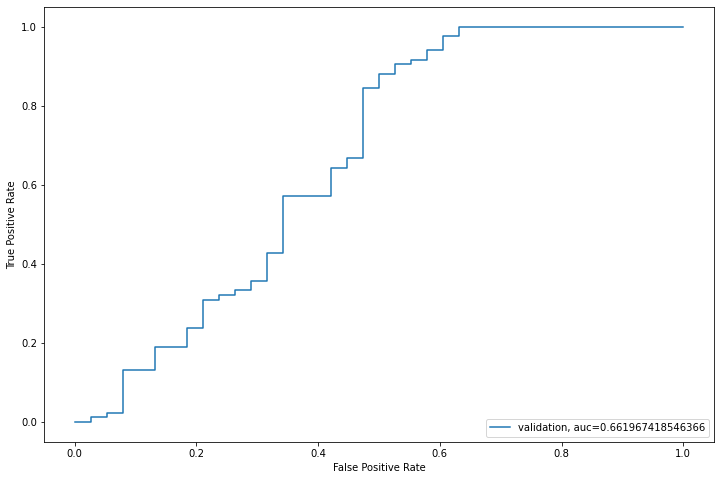

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_training, x_cv, y_training, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_training,y_training)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for training_index,testing_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[training_index],X.loc[testing_index]
    ytr,yvl = y[training_index],y[testing_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(testing)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8211382113821138

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8130081300813008

5 of kfold 5 
accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.807796881247501


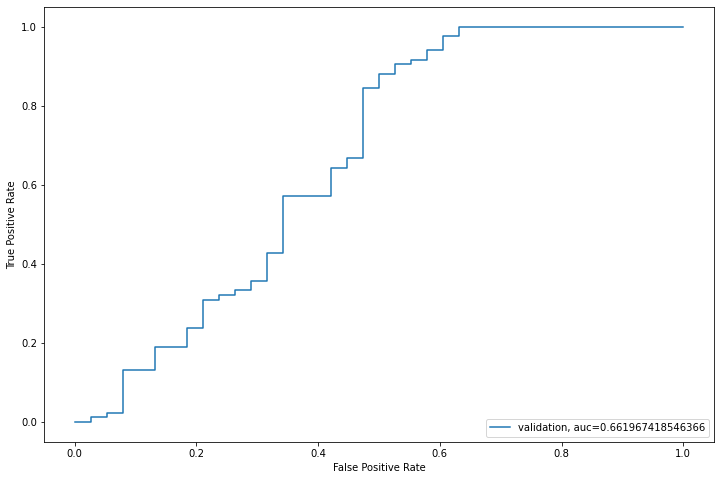

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:\\Users\\Piyush\\Desktop\\DataMining\\RandomForest.csv')

## Important Features:

<AxesSubplot:>

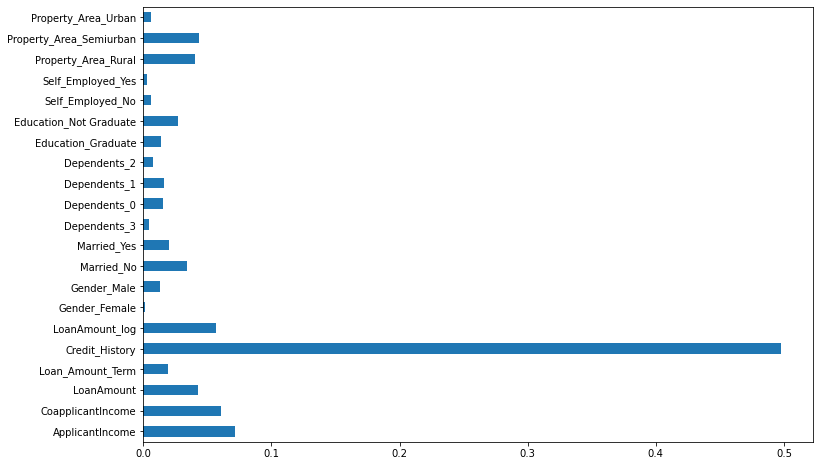

In [ ]:
important=pd.Series(model.feature_importances_, index=X.columns)
important.plot(kind='barh', figsize=(12,8))

## XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for training_index,testing_index in kf.split(X,y):
 print('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = X.loc[training_index],X.loc[testing_index]
 ytr,yvl = y[training_index],y[testing_index]
 model = XGBClassifier(n_estimators=50, max_depth=4)
 model.fit(xtr, ytr)
 pred_test = model.predict(xvl)
 score = accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(testing)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
[19:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8130081300813008

2 of kfold 5
[19:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7967479674796748

3 of kfold 5
[19:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

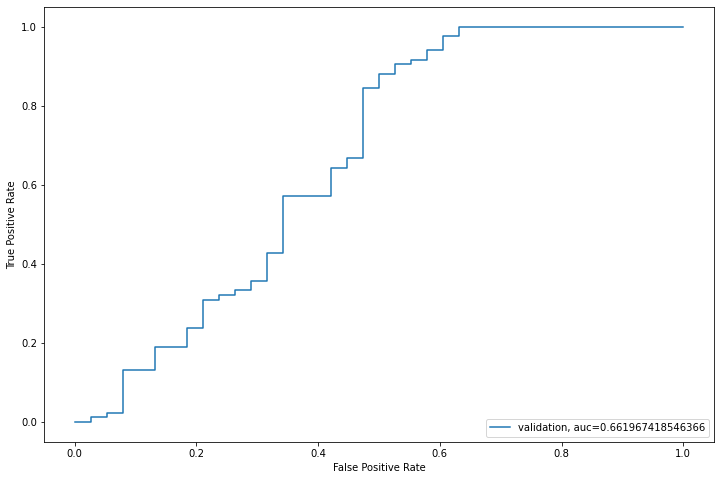

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:\\Users\\Piyush\\Desktop\\DataMining\\XGBoost.csv')